# Iris flower classification

# Steps for building a model
1. Import required Libraries and Load the data.
2. Explore the data.
3. Preprocess the data.
4. Visualization
5. Split the data into training and testing sets.
6. Build a model.
7. Result

# 1. Import required libraries and Load the data 

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [362]:
iris = pd.read_csv(r"C:\Users\Admin\Downloads\archive (7)\IRIS.csv")

# 2. Explore the data

In [363]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [364]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [365]:
iris.shape

(150, 5)

In [366]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [367]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# 3. Preprocess the data

In [368]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [369]:
iris['species'] = le.fit_transform(iris['species'])

In [370]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 4. Visualization

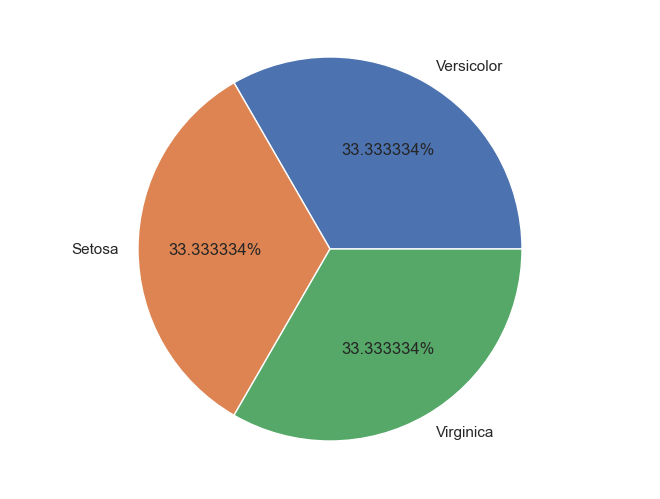

In [371]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l, autopct='%1f%%')
plt.show()

# This pie chart is created to visually represent the distribution of data among three classes: 
# Versicolor, Setosa, and Virginica. Each class is represented by a segment of the pie, 
# and the size of each segment corresponds to the proportion of data points belonging to that class in the dataset.

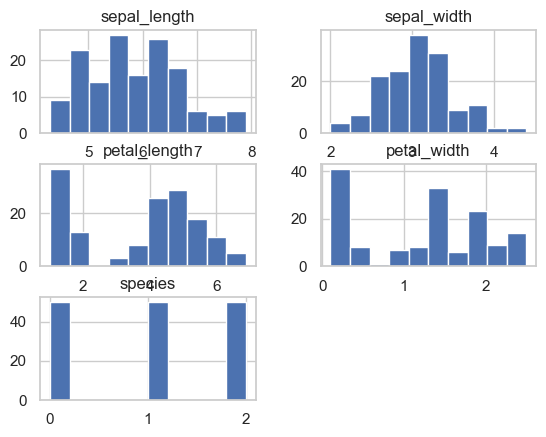

In [372]:
iris.hist()
plt.show()

# Here is a histogram for each numerical column in this iris DataFrame. 
# Each histogram represents a distribution of values for each particular feature 
# (e.g., sepal length, sepal width, petal length, petal width) in the Iris dataset.

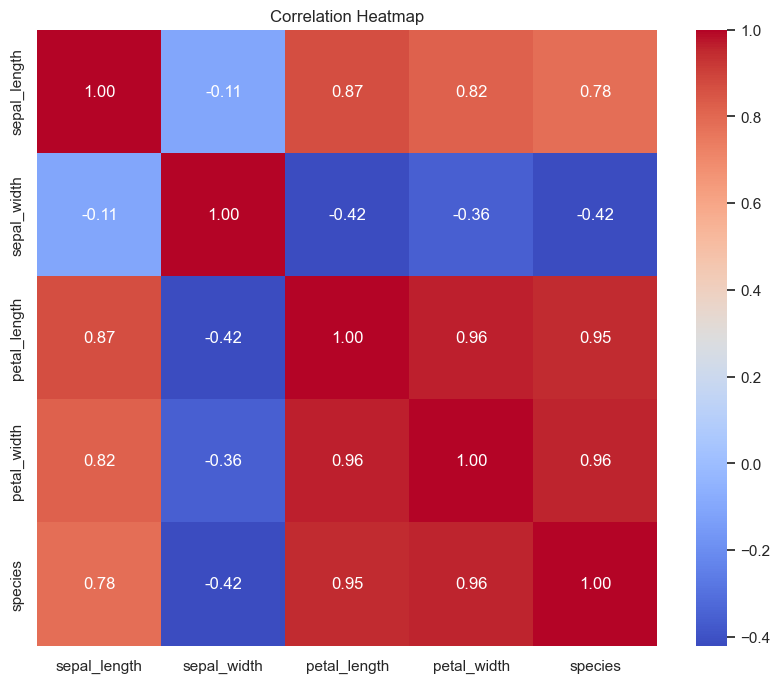

In [373]:
plt.figure(figsize=(10, 8))  
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 5. Split data into train and test 

In [321]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size=.2)

In [322]:
train_x = iris_train.iloc[:, 0:-1]
train_y = iris_train.iloc[:, -1]

test_x = iris_test.iloc[:, 0:-1]
test_y = iris_test.iloc[:, -1]

# 6. Build a model

In [323]:
# 1. Logistic Regression

In [324]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [325]:
logreg.fit(train_x, train_y)

LogisticRegression()

In [326]:
pred_logreg = logreg.predict(test_x)

In [327]:
confusion_matrix(test_y, pred_logreg)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  7]], dtype=int64)

In [328]:
print(classification_report(test_y, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [329]:
# 2. Decision Tree

In [330]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [331]:
dt.fit(train_x, train_y)

DecisionTreeClassifier()

In [332]:
pred_dt = dt.predict(test_x)

In [333]:
confusion_matrix(test_y, pred_dt)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  7]], dtype=int64)

In [334]:
print(classification_report(test_y, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [335]:
# 3. Random Forest

In [336]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [337]:
rfc.fit(train_x, train_y)

RandomForestClassifier()

In [338]:
pred_rfc = rfc.predict(test_x)

In [339]:
confusion_matrix(test_y, pred_rfc)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  7]], dtype=int64)

In [340]:
print(classification_report(test_y, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [341]:
# 4. Support Vector

In [342]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x,train_y)

SVC()

In [343]:
pred_svc = svc.predict(test_x)

In [344]:
confusion_matrix(test_y, pred_svc)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

In [345]:
print(classification_report(test_y, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [346]:
# 5. KNN 

In [347]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [348]:
knn.fit(train_x, train_y)

KNeighborsClassifier()

In [349]:
pred_knn = knn.predict(test_x)

In [350]:
confusion_matrix(test_y, pred_knn)

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  7]], dtype=int64)

In [351]:
print(classification_report(test_y, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      1.00      0.95         9
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# 7. Result
Here from all models SVM model is showing very good accuracy.

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. 
    It measures the accuracy of positive predictions. 
    here in SVM model, precision for each class is 1.00, 
    means all positive predictions for each class are correct.

- **Recall**: The ratio of correctly predicted positive observations to the all observations in actual class. 
    It measures the ability of the model to capture all the positive instances. 
    in SVM model, each class has a recall of 1.00, 
    indicating that the model correctly identified all instances of each class.

- **F1-score**: The weighted average of Precision and Recall. 
    It considers both false positives and false negatives. 
    It is a good way to show that a classifer has a good value for both recall and precision. 
    As with precision and recall, the F1-score for each class is 1.00.

- **Accuracy**: The proportion of correctly classified observations among the total observations. 
    In this case, the overall accuracy is also 1.00, indicating perfect performance.


In summary, 
the SVM model seems to be performing exceptionally well, with perfect precision, recall, and F1-score for each class, 
and an overall accuracy of 1.00. Which means that the SVM model is accurately classifying the observations in this dataset.

# Hence, I will use Support Vector Machine (SVM) algorithms to train my model.